### Questions
* 

### what did we learn? 
* rbf projects your data into a higher dimension then separates it
* how linear, sigmoid, rbf and polynomial separate data

### Objectives
YWBAT
* compare and contrast the various methods for SVMs
* implement SVMs using sklearn
* use model analysis to tailor SVM

### Outline
- Introduce dataset
- Go through various svm models and their use case
- Tweak SVMs to suit the problem

### What do SVMs do?
SVMs (Support Vector Machines) are machine learning models that divide data by using 'support vectors' to create decision boundaries. 

The sensitivity (or lack thereof) of your boundaries depends on you. 

Low Sensitivity boundaries are often wide
High Sensitivity boundaries are very narrow


### The 'Vector' Part of SVMs is the data. (x-values).

### When? Why?

SVMs are great to use anytime you want decisions to be made by using boundaries.  One example is finding points that are closest to the boundary and then using those points in your training set.  Boundaries are very helpful for classification, but also helpful for finding training points. 

Build a model
- classify new points and evaluate our classification
- if points weren't classified correctly we took their distance from the mislabeled class boundary 
- add those points to our training set
- leverage the distance from points and the decision boundary to find interesting points
    - FP where distance = 12.0 which would be an interesting point or it's an outlier

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_circles,  make_blobs, make_moons
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_groups(x, y):
    plt.figure(figsize=(8, 8))
    plt.grid(linestyle='dashed')
    color_dict = {0: 'g', 1: 'purple'}
    colors = ['g' if l == 0 else 'purple' for l in y]
    plt.scatter(x[:, 0], x[:, 1], c=colors, s=60, alpha=0.5)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()
    

def plot_groups3(x, y):
    plt.figure(figsize=(8, 8))
    plt.grid(linestyle='dashed')
    color_dict = {0: 'g', 1: 'purple', 2: 'yellow'}
    colors = [color_dict[l] for l in y]
    plt.scatter(x[:, 0], x[:, 1], c=colors, alpha=0.5, s=60)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()
    

    
def plot_svm_groups(x, y, clf):
    plt.figure(figsize=(8, 5))
    plt.grid()
    plot_decision_regions(x, y, clf, colors='green,purple,yellow', scatter_kwargs={"s": 100, "alpha": 0.5})
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("SVM Decision Boundary")
    plt.show()
    

def print_report(ytrain, ytest, ytrain_pred, ytest_pred):
    report = classification_report(ytrain, ytrain_pred)
    print("Train Scores\n" + "-"*50)
    print(report)
    accuracy = accuracy_score(ytrain, ytrain_pred)
    print(f"Train Accuracy: {accuracy}")
    report = classification_report(ytest, ytest_pred)
    print("Test Scores\n" + "-"*50)
    print(report)
    accuracy = accuracy_score(ytest, ytest_pred)
    print(f"Test Accuracy: {accuracy}")

## Linear SVM
![](images/svm-linear.png)

In [55]:
x, y = make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=4.5)

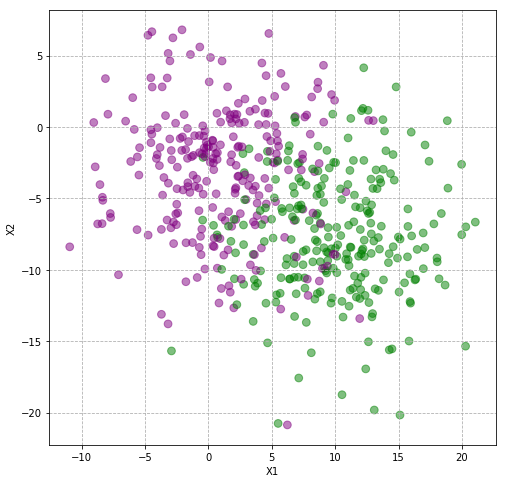

In [56]:
plot_groups(x, y)

In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

# SVMs are a family of models
* kernels
    * linear kernel
    * sigmoid kernel
    * polynomial kernel
    * rbf (radial basis function)
        * maps data into higher dimension

In [58]:
clf = LinearSVC()
clf.fit(xtrain, ytrain)

/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [59]:
df_test = pd.DataFrame(xtest, columns=['X1', 'X2'])
df_test.head()

,X1,X2
0,9.331623,-8.750034
1,-3.152424,-3.936672
2,1.554884,-8.603395
3,2.771143,-6.863905
4,6.786248,-4.651047


In [60]:
df_test['label'] = ytest
df_test.head()

,X1,X2,label
0,9.331623,-8.750034,0
1,-3.152424,-3.936672,1
2,1.554884,-8.603395,1
3,2.771143,-6.863905,0
4,6.786248,-4.651047,0


In [61]:
df_test['label_pred'] = clf.predict(xtest)
df_test.head()

,X1,X2,label,label_pred
0,9.331623,-8.750034,0,0
1,-3.152424,-3.936672,1,1
2,1.554884,-8.603395,1,1
3,2.771143,-6.863905,0,1
4,6.786248,-4.651047,0,0


In [62]:
df_test['decision_function'] = clf.decision_function(xtest)
df_test.head()

,X1,X2,label,label_pred,decision_function
0,9.331623,-8.750034,0,0,-0.708197
1,-3.152424,-3.936672,1,1,1.311523
2,1.554884,-8.603395,1,1,0.353785
3,2.771143,-6.863905,0,1,0.308930
4,6.786248,-4.651047,0,0,-0.081939


In [63]:
df_test['correct'] = df_test['label']==df_test['label_pred']

In [66]:
df_test.loc[df_test['decision_function']>=2] # notice all of these are between -1 and 1 

,X1,X2,label,label_pred,decision_function,correct
7,-8.548536,-4.035738,1,1,2.034595,True
65,-9.038396,0.311622,1,1,2.399906,True
121,-7.919589,0.891185,1,1,2.288442,True


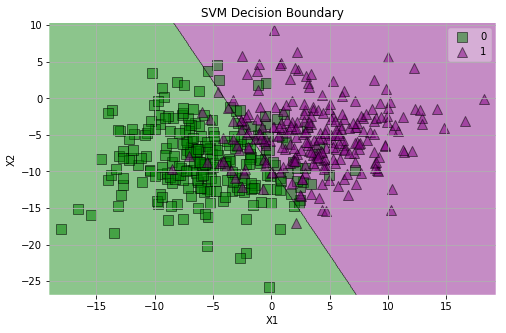

In [7]:
plot_svm_groups(x, y, clf)

/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


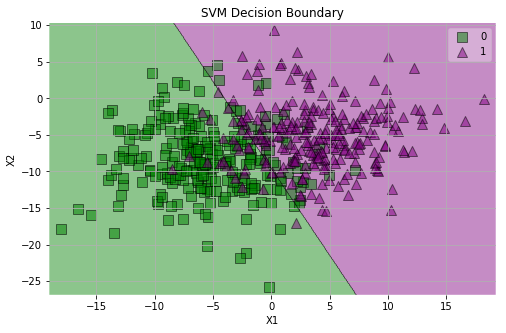

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       186
           1       0.85      0.87      0.86       189

    accuracy                           0.86       375
   macro avg       0.86      0.86      0.86       375
weighted avg       0.86      0.86      0.86       375

Train Accuracy: 0.856
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        64
           1       0.83      0.90      0.87        61

    accuracy                           0.86       125
   macro avg       0.87      0.86      0.86       125
weighted avg       0.87      0.86      0.86       125

Test Accuracy: 0.864


In [8]:
clf = LinearSVC()
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

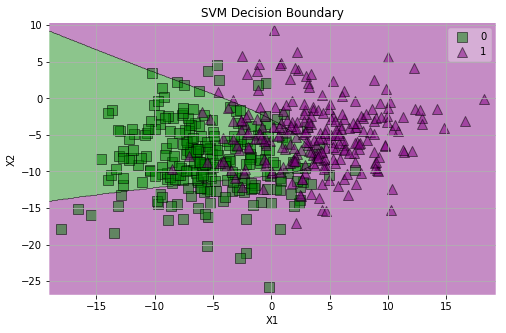

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       186
           1       0.70      0.70      0.70       189

    accuracy                           0.70       375
   macro avg       0.70      0.70      0.70       375
weighted avg       0.70      0.70      0.70       375

Train Accuracy: 0.7013333333333334
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        64
           1       0.73      0.79      0.76        61

    accuracy                           0.75       125
   macro avg       0.75      0.75      0.75       125
weighted avg       0.75      0.75      0.75       125

Test Accuracy: 0.752


In [9]:
clf = SVC(kernel='sigmoid')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

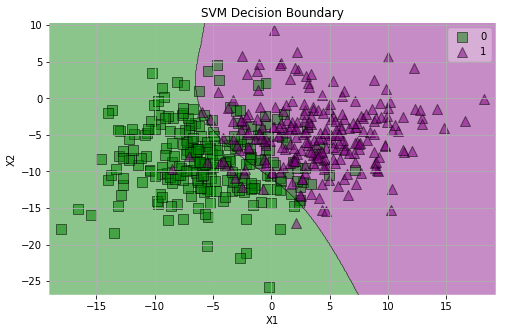

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       186
           1       0.80      0.94      0.87       189

    accuracy                           0.85       375
   macro avg       0.86      0.85      0.85       375
weighted avg       0.86      0.85      0.85       375

Train Accuracy: 0.8533333333333334
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.73      0.83        64
           1       0.78      0.97      0.86        61

    accuracy                           0.85       125
   macro avg       0.87      0.85      0.85       125
weighted avg       0.87      0.85      0.85       125

Test Accuracy: 0.848


In [16]:
clf = SVC(kernel='poly', degree=3)
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### let's look at RBF (Radial Basis Function)
- most popular svm 
- project your data into a higher dimension and separate it there

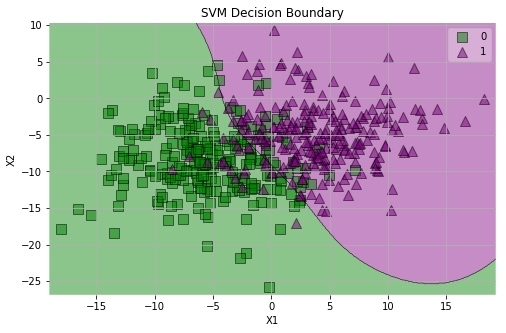

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       186
           1       0.86      0.88      0.87       189

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375

Train Accuracy: 0.8693333333333333
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        64
           1       0.85      0.92      0.88        61

    accuracy                           0.88       125
   macro avg       0.88      0.88      0.88       125
weighted avg       0.88      0.88      0.88       125

Test Accuracy: 0.88


In [17]:
clf = SVC(kernel='rbf')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

In [18]:
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)

In [19]:
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       186
           1       0.86      0.88      0.87       189

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375

Train Accuracy: 0.8693333333333333
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        64
           1       0.85      0.92      0.88        61

    accuracy                           0.88       125
   macro avg       0.88      0.88      0.88       125
weighted avg       0.88      0.88      0.88       125

Test Accuracy: 0.88


In [20]:
clf.predict(np.array([[0, 5]]))

array([1])

In [21]:
clf.decision_function(np.array([[-20, 20]]))

array([-0.0722016])

### Thoughts

- Training data is probably coming from the overlaps
- Testing data is probably from the outside of each group

## RBF SVM
![](images/svm-euc.png)

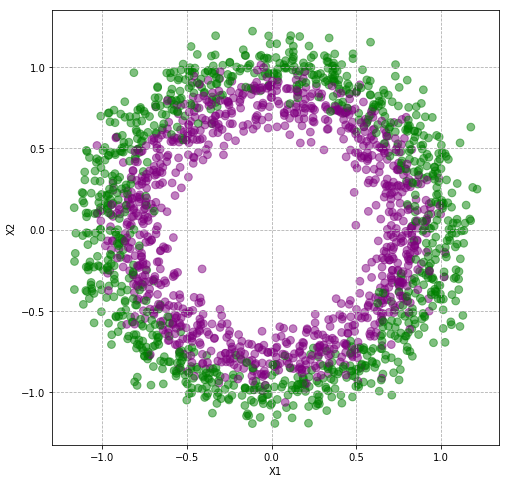

In [22]:
x, y = make_circles(n_samples=2000, shuffle=True, noise=0.1)
plot_groups(x, y)

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

### Linear SVM

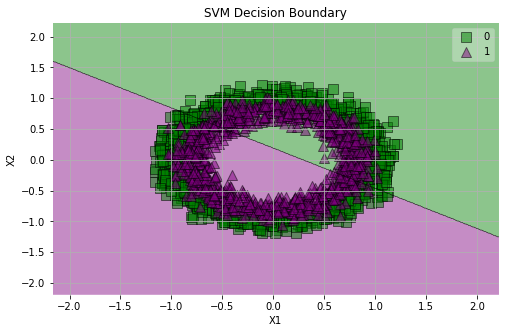

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.47      0.49       746
           1       0.52      0.57      0.54       754

    accuracy                           0.52      1500
   macro avg       0.52      0.52      0.52      1500
weighted avg       0.52      0.52      0.52      1500

Train Accuracy: 0.5186666666666667
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.47      0.41      0.44       254
           1       0.46      0.53      0.49       246

    accuracy                           0.47       500
   macro avg       0.47      0.47      0.47       500
weighted avg       0.47      0.47      0.47       500

Test Accuracy: 0.468


In [24]:
clf = LinearSVC()
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### RBF

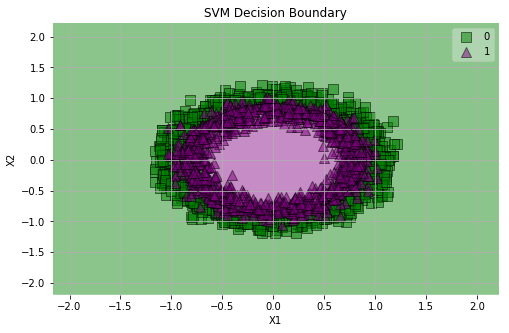

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       746
           1       0.84      0.85      0.84       754

    accuracy                           0.84      1500
   macro avg       0.84      0.84      0.84      1500
weighted avg       0.84      0.84      0.84      1500

Train Accuracy: 0.8406666666666667
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       254
           1       0.86      0.83      0.85       246

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500

Test Accuracy: 0.854


In [25]:
clf = SVC(kernel='rbf')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### Thoughts
- When do use this? 
- When the boundary isn't linear, when you cannot separate the data in the current dimensions. 

## Sigmoidal SVM

In [26]:
x, y = make_moons(n_samples=2000, noise=0.10)

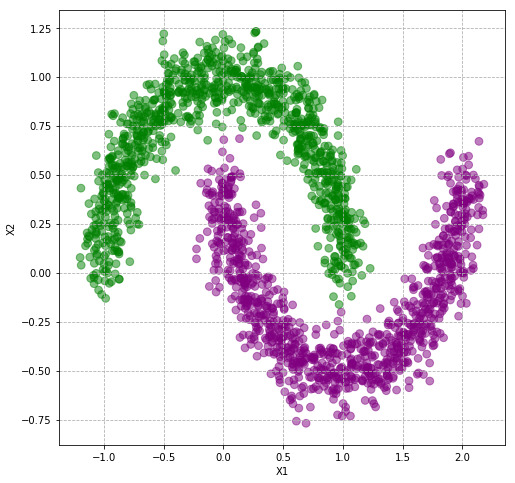

In [27]:
plot_groups(x, y)

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

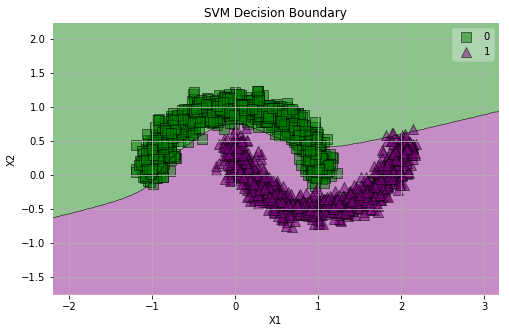

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       742
           1       0.87      1.00      0.93       758

    accuracy                           0.92      1500
   macro avg       0.93      0.92      0.92      1500
weighted avg       0.93      0.92      0.92      1500

Train Accuracy: 0.9206666666666666
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       258
           1       0.87      1.00      0.93       242

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500

Test Accuracy: 0.926


In [32]:
clf = SVC(kernel='poly', degree=5)
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### RBF

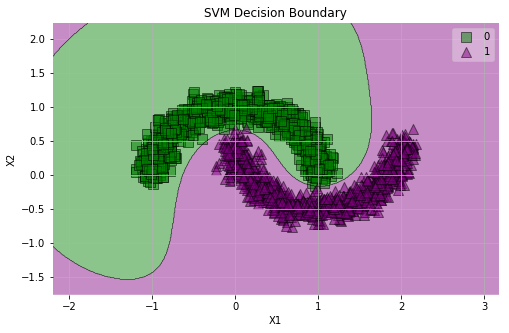

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       742
           1       1.00      1.00      1.00       758

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Train Accuracy: 0.9993333333333333
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      1.00      1.00       242

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Test Accuracy: 0.998


In [33]:
clf = SVC(kernel='rbf')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### Linear

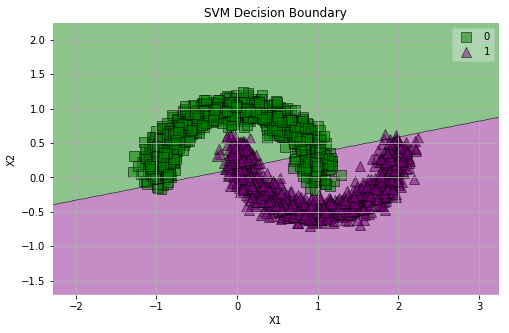

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       749
           1       0.88      0.88      0.88       751

    accuracy                           0.88      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.88      0.88      0.88      1500

Train Accuracy: 0.8833333333333333
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       251
           1       0.85      0.86      0.85       249

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500

Test Accuracy: 0.852


In [46]:
clf = LinearSVC()
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

## Polynomial SVM

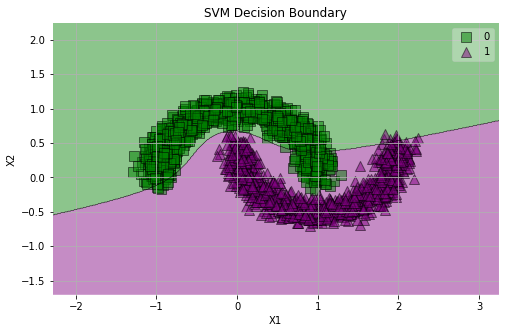

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       749
           1       0.89      0.99      0.94       751

    accuracy                           0.93      1500
   macro avg       0.94      0.93      0.93      1500
weighted avg       0.94      0.93      0.93      1500

Train Accuracy: 0.9333333333333333
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       251
           1       0.86      1.00      0.92       249

    accuracy                           0.92       500
   macro avg       0.93      0.92      0.92       500
weighted avg       0.93      0.92      0.92       500

Test Accuracy: 0.916


In [47]:
clf = SVC(kernel='poly', degree=3, gamma='auto')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

###  Thoughts?

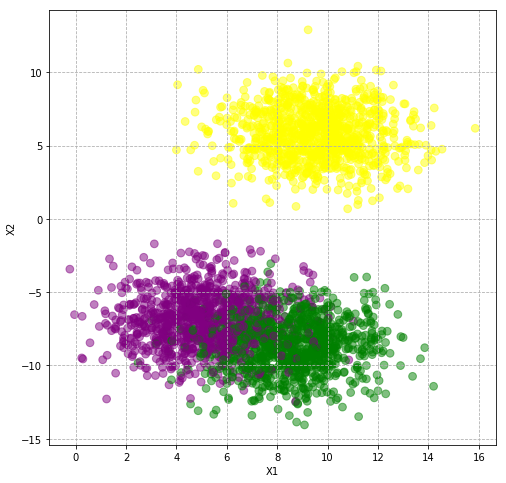

In [34]:
x, y = make_blobs(n_samples=3000, n_features=2, centers=3, cluster_std=1.8)
plot_groups3(x, y)

## Let's try all types of SVMs

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

### Linear

degree = 1
--------------------------------------------------


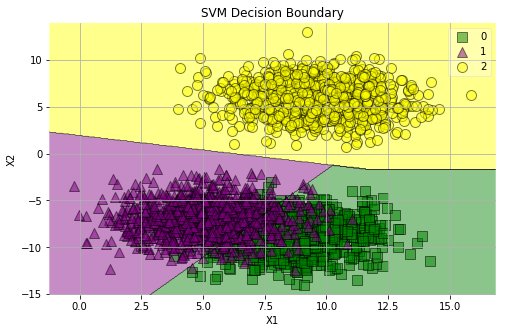

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       731
           1       0.87      0.86      0.86       742
           2       1.00      1.00      1.00       777

    accuracy                           0.91      2250
   macro avg       0.91      0.91      0.91      2250
weighted avg       0.91      0.91      0.91      2250

Train Accuracy: 0.9097777777777778
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       269
           1       0.82      0.85      0.84       258
           2       1.00      1.00      1.00       223

    accuracy                           0.89       750
   macro avg       0.89      0.89      0.89       750
weighted avg       0.89      0.89      0.89       750

Test Accuracy: 0.8853333333333333



degree = 2
----------------------------

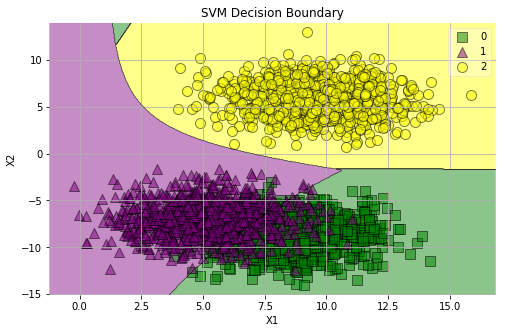

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       731
           1       0.87      0.87      0.87       742
           2       1.00      1.00      1.00       777

    accuracy                           0.91      2250
   macro avg       0.91      0.91      0.91      2250
weighted avg       0.91      0.91      0.91      2250

Train Accuracy: 0.9124444444444444
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       269
           1       0.82      0.88      0.85       258
           2       1.00      1.00      1.00       223

    accuracy                           0.89       750
   macro avg       0.90      0.90      0.90       750
weighted avg       0.89      0.89      0.89       750

Test Accuracy: 0.8933333333333333



degree = 3
----------------------------

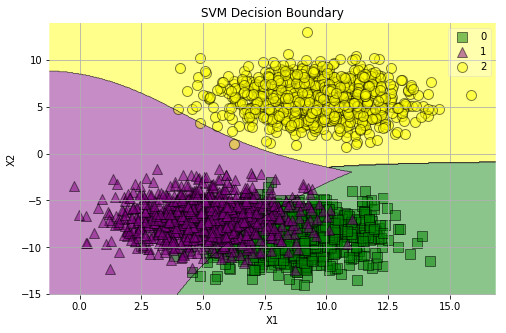

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       731
           1       0.85      0.87      0.86       742
           2       1.00      1.00      1.00       777

    accuracy                           0.91      2250
   macro avg       0.91      0.91      0.91      2250
weighted avg       0.91      0.91      0.91      2250

Train Accuracy: 0.9088888888888889
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       269
           1       0.82      0.90      0.86       258
           2       1.00      1.00      1.00       223

    accuracy                           0.90       750
   macro avg       0.90      0.90      0.90       750
weighted avg       0.90      0.90      0.90       750

Test Accuracy: 0.896



degree = 4
-----------------------------------------

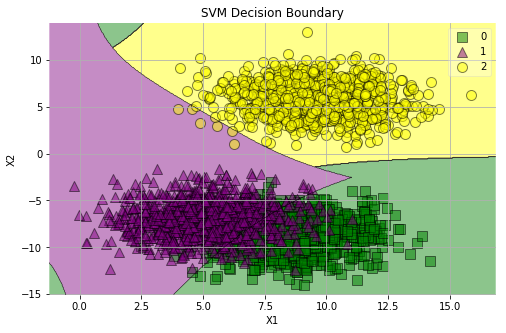

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       731
           1       0.84      0.88      0.86       742
           2       1.00      0.99      1.00       777

    accuracy                           0.91      2250
   macro avg       0.91      0.90      0.91      2250
weighted avg       0.91      0.91      0.91      2250

Train Accuracy: 0.9066666666666666
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.80      0.84       269
           1       0.81      0.90      0.85       258
           2       1.00      1.00      1.00       223

    accuracy                           0.89       750
   macro avg       0.90      0.90      0.90       750
weighted avg       0.90      0.89      0.89       750

Test Accuracy: 0.8933333333333333



degree = 5
----------------------------

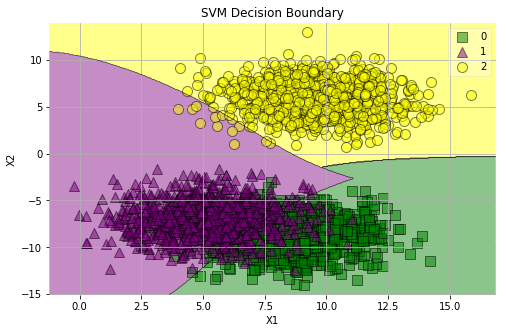

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       731
           1       0.82      0.89      0.86       742
           2       1.00      0.99      0.99       777

    accuracy                           0.90      2250
   macro avg       0.90      0.90      0.90      2250
weighted avg       0.90      0.90      0.90      2250

Train Accuracy: 0.9008888888888889
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.78      0.84       269
           1       0.80      0.91      0.85       258
           2       1.00      0.99      1.00       223

    accuracy                           0.89       750
   macro avg       0.90      0.90      0.89       750
weighted avg       0.89      0.89      0.89       750

Test Accuracy: 0.8893333333333333



degree = 6
----------------------------

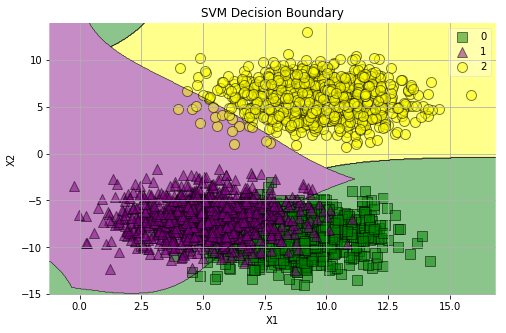

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       731
           1       0.81      0.90      0.85       742
           2       1.00      0.98      0.99       777

    accuracy                           0.90      2250
   macro avg       0.90      0.90      0.90      2250
weighted avg       0.90      0.90      0.90      2250

Train Accuracy: 0.8986666666666666
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       269
           1       0.79      0.92      0.85       258
           2       1.00      0.99      1.00       223

    accuracy                           0.89       750
   macro avg       0.90      0.90      0.90       750
weighted avg       0.90      0.89      0.89       750

Test Accuracy: 0.8906666666666667



degree = 7
----------------------------

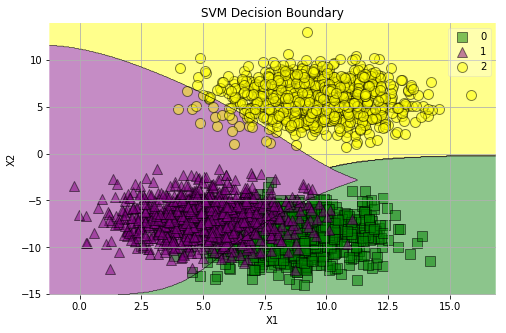

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.80      0.84       731
           1       0.80      0.91      0.85       742
           2       1.00      0.97      0.99       777

    accuracy                           0.89      2250
   macro avg       0.90      0.89      0.89      2250
weighted avg       0.90      0.89      0.90      2250

Train Accuracy: 0.8946666666666667
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       269
           1       0.78      0.93      0.85       258
           2       1.00      0.98      0.99       223

    accuracy                           0.89       750
   macro avg       0.90      0.89      0.89       750
weighted avg       0.90      0.89      0.89       750

Test Accuracy: 0.888



degree = 8
-----------------------------------------

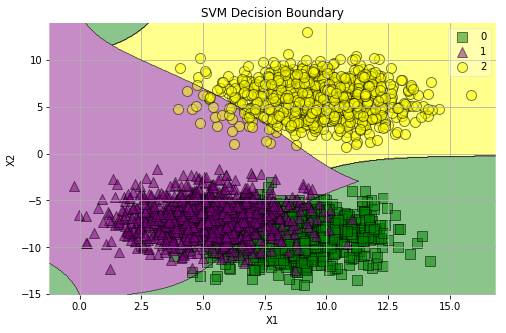

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.78      0.84       731
           1       0.78      0.92      0.84       742
           2       1.00      0.96      0.98       777

    accuracy                           0.89      2250
   macro avg       0.90      0.89      0.89      2250
weighted avg       0.90      0.89      0.89      2250

Train Accuracy: 0.8888888888888888
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       269
           1       0.76      0.93      0.84       258
           2       1.00      0.98      0.99       223

    accuracy                           0.88       750
   macro avg       0.89      0.88      0.88       750
weighted avg       0.89      0.88      0.88       750

Test Accuracy: 0.876



degree = 9
-----------------------------------------

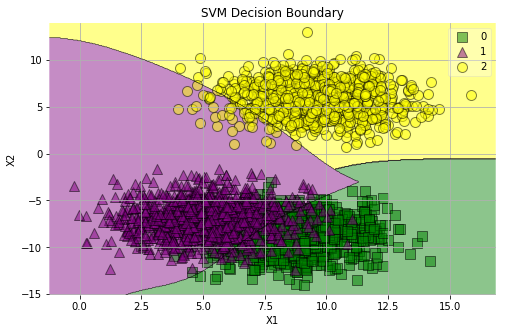

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       731
           1       0.77      0.92      0.84       742
           2       1.00      0.95      0.98       777

    accuracy                           0.88      2250
   macro avg       0.89      0.88      0.88      2250
weighted avg       0.89      0.88      0.89      2250

Train Accuracy: 0.8848888888888888
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       269
           1       0.76      0.94      0.84       258
           2       1.00      0.97      0.99       223

    accuracy                           0.88       750
   macro avg       0.90      0.88      0.88       750
weighted avg       0.89      0.88      0.88       750

Test Accuracy: 0.876





In [36]:
for degree in range(1, 10):
    print(f"degree = {degree}")
    print("-"*50)
    clf = SVC(kernel='poly', degree=degree)
    clf.fit(xtrain, ytrain)
    ytrain_pred = clf.predict(xtrain)
    ytest_pred = clf.predict(xtest)
    plot_svm_groups(x, y, clf)
    print_report(ytrain, ytest, ytrain_pred, ytest_pred)
    print("\n\n")

### Polynomial (3)

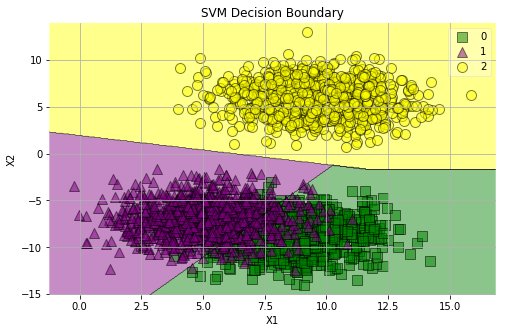

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       731
           1       0.87      0.86      0.86       742
           2       1.00      1.00      1.00       777

    accuracy                           0.91      2250
   macro avg       0.91      0.91      0.91      2250
weighted avg       0.91      0.91      0.91      2250

Train Accuracy: 0.9097777777777778
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       269
           1       0.82      0.85      0.84       258
           2       1.00      1.00      1.00       223

    accuracy                           0.89       750
   macro avg       0.89      0.89      0.89       750
weighted avg       0.89      0.89      0.89       750

Test Accuracy: 0.8853333333333333


In [37]:
clf = SVC(kernel='poly', degree=1)
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### RBF

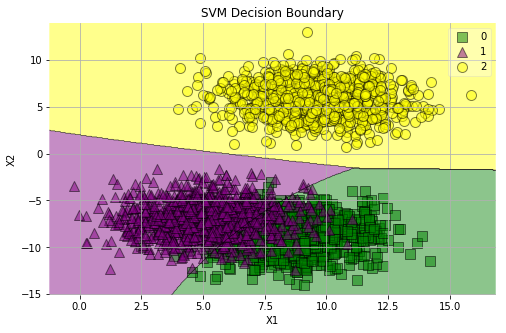

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       731
           1       0.88      0.85      0.87       742
           2       1.00      1.00      1.00       777

    accuracy                           0.91      2250
   macro avg       0.91      0.91      0.91      2250
weighted avg       0.91      0.91      0.91      2250

Train Accuracy: 0.9124444444444444
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       269
           1       0.83      0.86      0.84       258
           2       1.00      1.00      1.00       223

    accuracy                           0.89       750
   macro avg       0.90      0.90      0.90       750
weighted avg       0.89      0.89      0.89       750

Test Accuracy: 0.8893333333333333


In [38]:
clf = SVC(kernel='rbf')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### Sigmoidal

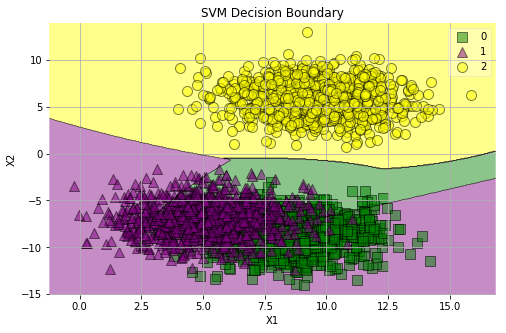

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.28      0.28      0.28       731
           1       0.30      0.30      0.30       742
           2       1.00      1.00      1.00       777

    accuracy                           0.54      2250
   macro avg       0.53      0.53      0.53      2250
weighted avg       0.54      0.54      0.54      2250

Train Accuracy: 0.5364444444444444
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.33      0.33      0.33       269
           1       0.31      0.31      0.31       258
           2       1.00      1.00      1.00       223

    accuracy                           0.52       750
   macro avg       0.55      0.55      0.55       750
weighted avg       0.52      0.52      0.52       750

Test Accuracy: 0.5226666666666666


In [39]:
clf = SVC(kernel='sigmoid')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### Assessment